<a href="https://colab.research.google.com/github/ZuckermanLab/T32_Nanocourse/blob/main/ProbabilityEtc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a = 4
b = 5
c = 6
print(a,b,c)

4 5 6


In [ ]:
# do some math
f = b * c
print(f)

30


In [ ]:
print(f"a = {a}    b = {b}    c = {c}")  # The f enables printing values within a (quoted) string
print(a, "\n", b, "\n", c)  # lots of ways to print things - "\n" is new line 'character'

a = 4    b = 5    c = 6
4 
 5 
 6


In [ ]:
a = 7

In [ ]:
# ORDER MATTERS IN PYTHON NOTEBOOKS - BE CAREFUL!
print(a)
# re-run first definition of a above and print again

4


In [ ]:
# LISTS AND LOOPS ARE KEY ELEMENTS OF PYTHON COMPUTING AND DATA ANALYSIS
instructors = ["Olga", "Nick", "Luke", "John", "Dan", "Jeremy"]  # a list of strings
quant = len(instructors)  # number of elements in the list
print(f"There are {quant} instructors:")
for teacher in instructors:  # The colon ":" here indicates the following line(s) depend on this line
  print(teacher)  # ALL INDENTED LINES DEPEND ON ALL PREVIOUS NON-INDENTED LINES

There are 6 instructors:
Olga
Nick
Luke
John
Dan
Jeremy


In [ ]:
from random import *  # we often want to use a library of functions that is not part of basic python
max = 20
rand_list = []  # blank list to start
count = 0
while (count < max):
  count = count + 1
  rand_list.append( random() )  # random with empty argument "()" gives a number between 0 and 1
print(f"We obtained {len(rand_list)} elements")
print(rand_list)

We obtained 20 elements
[0.647952779256079, 0.8794726324657679, 0.6441389780861981, 0.10949585147956709, 0.4427524915668536, 0.5306515634878576, 0.301193699590496, 0.18520728986763102, 0.7045586730732879, 0.36177800215749256, 0.25060694254164817, 0.4438421639190452, 0.2431633403863973, 0.8397820191263041, 0.9609621204638582, 0.005922235589110314, 0.9216266348276202, 0.32042895624321666, 0.10461361534874003, 0.6209059927212612]


In [ ]:
# Make a new list by doing some math on every element of a list
squaredvals = []  # empty list
for number in rand_list:
  squared = number**2
  squaredvals.append( squared )
  print(number, squared)   # good to print things to check program is performing correctly

0.647952779256079 0.419842804145677
0.8794726324657679 0.7734721112562677
0.6441389780861981 0.4149150230899316
0.10949585147956709 0.011989341491235414
0.4427524915668536 0.19602976878865677
0.5306515634878576 0.28159108183210774
0.301193699590496 0.09071764467300997
0.18520728986763102 0.0343017402201127
0.7045586730732879 0.49640292380279216
0.36177800215749256 0.13088332284506668
0.25060694254164817 0.06280383965007295
0.4438421639190452 0.19699586647234058
0.2431633403863973 0.05912841010787092
0.8397820191263041 0.7052338396478522
0.9609621204638582 0.9234481969663947
0.005922235589110314 3.507287437292479e-05
0.9216266348276202 0.8493956540236836
0.32042895624321666 0.10267471599911726
0.10461361534874003 0.010944008516334135
0.6209059927212612 0.3855242517971749


In [ ]:
# NUMERICAL PYTHON - NUMPY
# Every mathematical operation has a better implementation in numpy - faster, less memory
import numpy as np  # we can make our own abbreviation - np is typical
count = 20
array_rand = np.random.rand(count)  # a single command accomplishes same as our loop above
# Note this is an ARRAY, not a list.  Arrays can be very complex objects - e.g., like matrices.
print( array_rand )
sq_array = array_rand**2.0  # a single command does the same operation on ALL elements
print ( sq_array )

[0.21982915 0.63107347 0.07664379 0.38494985 0.74813896 0.8769229
 0.13280225 0.53016344 0.75628401 0.42007775 0.86285502 0.69032536
 0.07255305 0.16658637 0.32574752 0.49440787 0.66354145 0.50925832
 0.22512038 0.79296787]
[0.04832485 0.39825373 0.00587427 0.14818638 0.5597119  0.76899378
 0.01763644 0.28107327 0.5719655  0.17646531 0.74451878 0.4765491
 0.00526394 0.02775102 0.10611145 0.24443914 0.44028726 0.25934403
 0.05067918 0.62879805]


In [ ]:
# turn it into a function
def square_this_array( input_array ):
  return input_array**2.0
print( array_rand )
array2 = square_this_array( array_rand )
print( array2 )


[0.21982915 0.63107347 0.07664379 0.38494985 0.74813896 0.8769229
 0.13280225 0.53016344 0.75628401 0.42007775 0.86285502 0.69032536
 0.07255305 0.16658637 0.32574752 0.49440787 0.66354145 0.50925832
 0.22512038 0.79296787]
[0.04832485 0.39825373 0.00587427 0.14818638 0.5597119  0.76899378
 0.01763644 0.28107327 0.5719655  0.17646531 0.74451878 0.4765491
 0.00526394 0.02775102 0.10611145 0.24443914 0.44028726 0.25934403
 0.05067918 0.62879805]


NUMBER ONE THING TO KNOW ABOUT PYTHON - 
WHATEVER YOU WANT TO DO, IT'S SAFE TO ASSUME SOMEONE HAS DONE IT BEFORE ...
SO GOOGLE IT.  Finding the precise thing you want may take some rephrasing of your search, or tweaking exisiting code.  But
DON'T BE AFRAID TO EXPERIMENT - IT'S JUST CODE!

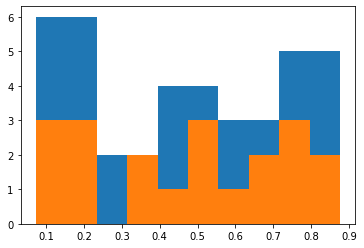

In [ ]:
# Probability distributions in one dimension (1D)
# Bin size matters!!
import matplotlib.pyplot as plt
u5 = plt.hist(array_rand, bins = 5)
u10 = plt.hist(array_rand, bins = 10)

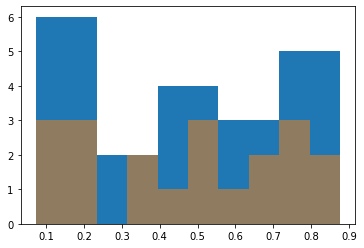

In [ ]:
# Make plots a little easier to understand
u5 = plt.hist(array_rand, bins = 5)
u10 = plt.hist(array_rand, bins = 10, alpha=0.5)  # alpha is transparency parameter

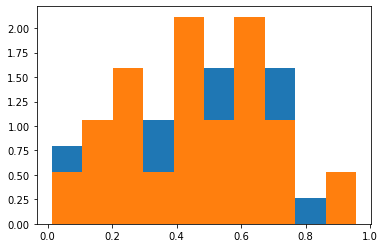

In [ ]:
# Better use a density!
# DEFINE
nbin = 5
u5_norm = plt.hist(array_rand, bins = nbin, density=True)
nbin = 10
u10_norm = plt.hist(array_rand, bins = nbin, density=True)
plt.show(u5_norm, u10_norm)
# How to 'reality check' a density?  Guesstimate the area

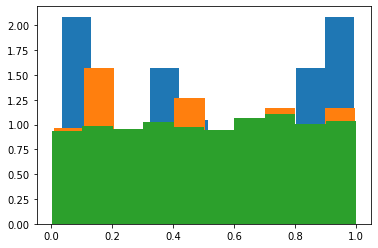

In [ ]:
# Noise and sampling - Less data, less idea what's going on
# Noisy data could support different hypotheses!
# Let's examine effects of having more data
def make_array_rand_plot( count ):  # function to make histogram
  tmp_array = np.random.rand(count)  # compare to code above
  return plt.hist(tmp_array, density=True)
unorm_20 = make_array_rand_plot( 20 )
unorm_200 = make_array_rand_plot( 200 )
unorm_2000 = make_array_rand_plot( 2000 )
plt.show()
# Run cell multiple times to see range of outcomes (due to random noise)

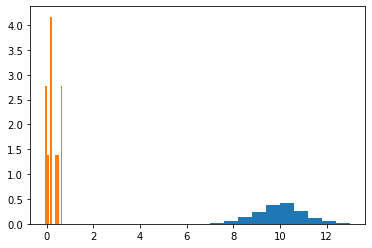

In [ ]:
# The difference between variance and uncertainty
# Variance - often measured by standard deviation - tells us the 
# amount of variability expected among samples from a distribution
# (e.g., from repeated runs of an experiment)
# Uncertainty, on the other hand, tells us the precision with
# which we know a certain value.  If we have made many measurements,
# the uncertainty can be *much* smaller than the standard deviation.
# How many replicates is enough?  That depends on the question you
# want to answer.  For example, it's easy to distinguish the average
# height of adults from those of pre-school children, but distinguishing
# the average heights of 13 vs. 14-year-olds would require many measurements.
mu1 = 10.0
sigma1 = 1.0
data1 = np.random.randn(1000) * sigma1 + mu1
plt.hist(data1, density=True)
mu2 = 0.25
sigma2 = 0.25
data2 = np.random.randn(10) * sigma2 + mu2
plt.hist(data2, density=True)
plt.show()
# We can have a very precise estimate of the mean of a data set with large variance
# We might have a poor estimate of the mean of a low-variance data set - 'poor'
# in the sense that we cannot be confident the mean is positive in this case.

# Visualizing distributions

In [ ]:
# 2D distributions and visualizations (John)
# contour plots, heat maps
# comparing 2D densities via heat map

In [ ]:
# Marginalizing/projecting: 2D -> 1D (John)

In [ ]:
# Dimensionality reduction (John)
# PCA

In [ ]:
import numpy as np
from  matplotlib import  pyplot as plt

## Make some sample data

Let's make some sample data, and plot it in a few  different ways.

In [ ]:
sample_size  = 100000

x_data = np.random.normal(loc=5, scale=1, size=sample_size)
y_data = np.random.normal(loc=5, scale=.5, size=sample_size)

(0.0, 10.0)

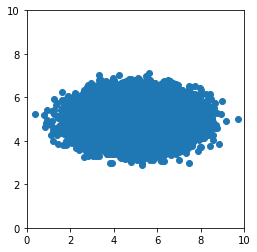

In [ ]:
# First, the scatter plot of course. I set the aspect ratio equal so you can see
#   this is an ellipsoidal distribution of data

plt.scatter(x_data, y_data)

plt.gca().set_aspect('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)

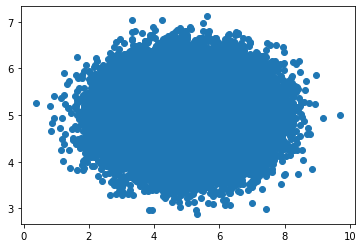

In [ ]:
# Because if I don't, the auto-scaling might make you think it's circular!

plt.scatter(x_data, y_data)

(0.0, 10.0)

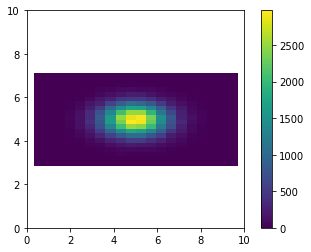

In [ ]:
# Do a 2-D histogram. Here, try adjusting the number of bins and see how
# that affects the resolution of the histogram.

#  This returns 
counts,  x_bins, y_bins, _ = plt.hist2d(x_data, y_data, bins=20)

plt.colorbar()
plt.gca().set_aspect('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)

(0.0, 10.0)

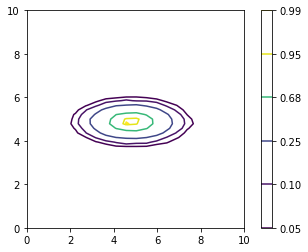

In [ ]:
# And a contour plot. Here, try playing with the levels the contours are plotted
# at, or try omitting that argument entirely.

plt.contour(x_bins[:-1], y_bins[:-1], 
            counts/counts.max(), 
            levels=[0.05, 0.1, 0.25, 0.68, 0.95, 0.99])

plt.colorbar()
plt.gca().set_aspect('equal')
plt.xlim(0, 10)
plt.ylim(0, 10)

# PCA Dimensionality reduction

## Preparing some sample data

First, let's generate some data and rotate it.

Pay attention to the shape of the data! There are some  subtleties with this that will become important. Right now, it's organized as `[dimension, sample]` -- in other words,  as `[[x_coord_1, x_coord_2, ...], [y_coord_1, y_coord_2, ...]]`, and NOT `[[x_coord_1, y_coord_1], [x_coord_2, y_coord_2], ...]`.

In [ ]:
sample_size = 500

x_data = np.random.normal(loc=0, scale=1, size=sample_size)
y_data = np.random.normal(loc=0, scale=.5, size=sample_size)

data = np.array([x_data, y_data])
data.shape

(2, 500)

Quick note:

The `*` operator "unpacks" an array-like into arguments.

So,
`plt.scatter(*[[x_coord_1, y_coord_1], [x_coord_2, y_coord_2], ...])` 
 is just like doing 
 `plt.scatter([x_coord_1, y_coord_1], [x_coord_2, y_coord_2], ...)`.
You'll see this a lot in the context of matplotlib.

(-5.0, 5.0)

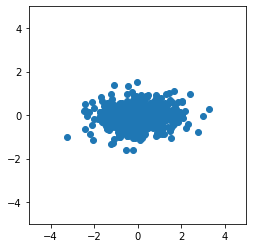

In [ ]:
plt.scatter(*data)

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

Now let's rotate that data a little,  and plot that.

In [ ]:
# Rotate by Pi/3 radians
rotation_radians = np.pi/3

# Build a rotation matrix, and use it to rotate our coords about the origin
rotation_matrix = np.array([[
                            np.cos(rotation_radians), -np.sin(rotation_radians)],
                            [np.sin(rotation_radians), np.cos(rotation_radians)]
])
rotated_data = rotation_matrix @ data

(-5.0, 5.0)

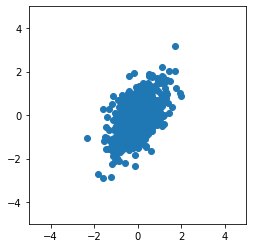

In [ ]:
plt.scatter(*rotated_data)

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 2-D component analysis

Now, let's estimate  the principal  axes of this data. Imagine we're starting with the rotated data -- how can we separate out the original x and y axes?

In [ ]:
from sklearn.decomposition import PCA

Here, we'll do the PCA decomposition.

Remember  that our data was originally in the  shape `[dimension, sample]`. For PCA, we  need it in `[sample, dimension]`.

Think of it like a list of observations. Each observation has 2 numbers associated with it (the coordinates).

Here, you can explicitly specify `PCA(n_components=2)`, but it should automatically detect that 2 components works best.

In [ ]:
pca = PCA()
pca.fit(rotated_data.T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

That was easy!

Now let's look at the components in their vector form, and  the amount of total variance each component  explains

In [ ]:
pca.components_

array([[ 0.53106818,  0.84732909],
       [-0.84732909,  0.53106818]])

In [ ]:
pca.explained_variance_ratio_

array([0.78010727, 0.21989273])

The PCA rotation matrix should be pretty similar to the inverse of the rotation  matrix (and should get closer with more samples!)

In [ ]:
np.linalg.inv(rotation_matrix)

array([[ 0.5      ,  0.8660254],
       [-0.8660254,  0.5      ]])

Slight detour for a cell:

Implicitly, we know that when you write down the component vectors as  in `pca.components_`, they start at the origin.

To plot them, however, we're using the function `plt.scatter(x_data, y_data, ...)`,  so  we need to have the origin explicitly in the data. Let's make both component vectors start  at [0,0].

In [ ]:
pc1_vectors = np.array([
                         [0,0], 
                         pca.components_[0]
                        ])

pc2_vectors = np.array([
                         [0,0], 
                         pca.components_[1]
                        ])

# Now, you can see we have an array of [[x0, y0], [x1, y1]]
pc1_vectors

array([[0.        , 0.        ],
       [0.53106818, 0.84732909]])

Let's visualize these components over our data. With enough samples, these should describe it pretty well.

I've also shown in the legend the percentage of  total  variance each PC describes. Note which one is higher.

In [1]:
# To make the component lines longer, try multiplying by some scalar

plt.plot(*pc1_vectors.T, color='orange', linewidth=3, 
         label=f'PC1 ({pca.explained_variance_ratio_[0]*100:.0f}% of var)')

plt.plot(*pc2_vectors.T, color='green', linewidth=3, 
         label=f'PC2 ({pca.explained_variance_ratio_[1]*100:.0f}% of var)')

plt.scatter(*rotated_data)
plt.legend(loc='lower right')

plt.xlabel('x')
plt.ylabel('y')

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

NameError: ignored

Now, let's re-plot our data in PCA space. This should remove the rotation we added in.

(Note that this might be reflected over one or  both axes from the initial data)

(-5.0, 5.0)

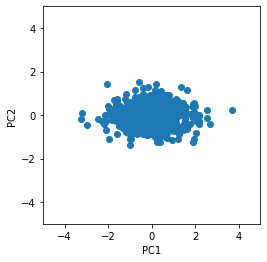

In [ ]:
pca_data = pca.transform(rotated_data.T)

plt.scatter(*pca_data.T)

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.gca().set_aspect('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [ ]:
# Non-linear dimensionality reduction ... and on to ML (Jeremy)

In [ ]:
# where to fit into exacloud?  First class or not?  Nick?